In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

In [5]:
url='https://drive.google.com/file/d/1u8aWZyS2apEnNsEWbIxjeJ4PGO_KW3rQ/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, encoding='latin-1')

In [6]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,Iâm on this kick of drinking 5 cups of warm ...,['https://media.consumeraffairs.com/files/cach...


In [7]:
stop = stopwords.words('english')

In [8]:
df_review = df[['Review']]
df_review

,Review
0,Amber and LaDonna at the Starbucks on Southwes...
1,** at the Starbucks by the fire station on 436...
2,I just wanted to go out of my way to recognize...
3,Me and my friend were at Starbucks and my card...
4,Iâm on this kick of drinking 5 cups of warm ...
...,...
845,I ordered two venti frappacino's without whipp...
846,No Review Text
847,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL..."
848,No Review Text


In [11]:
df_review['Review'].value_counts()

Review
No Review Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       37
Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. A

In [12]:
filtered_reviews = df_review[df_review['Review']!= "No Review Text"]
filtered_reviews

,Review
0,Amber and LaDonna at the Starbucks on Southwes...
1,** at the Starbucks by the fire station on 436...
2,I just wanted to go out of my way to recognize...
3,Me and my friend were at Starbucks and my card...
4,Iâm on this kick of drinking 5 cups of warm ...
...,...
841,"When using my debit card, how much and for how..."
842,I just bought a starbucks thermos mug about a ...
844,I'm (was) a regular customer who ordered a lat...
845,I ordered two venti frappacino's without whipp...


In [13]:
from wordcloud import WordCloud,STOPWORDS

In [14]:
wc = WordCloud(width=500,height=500,background_color="black",stopwords = STOPWORDS)

In [19]:
wc.generate(" ".join(filtered_reviews['Review'].astype(str).tolist()))

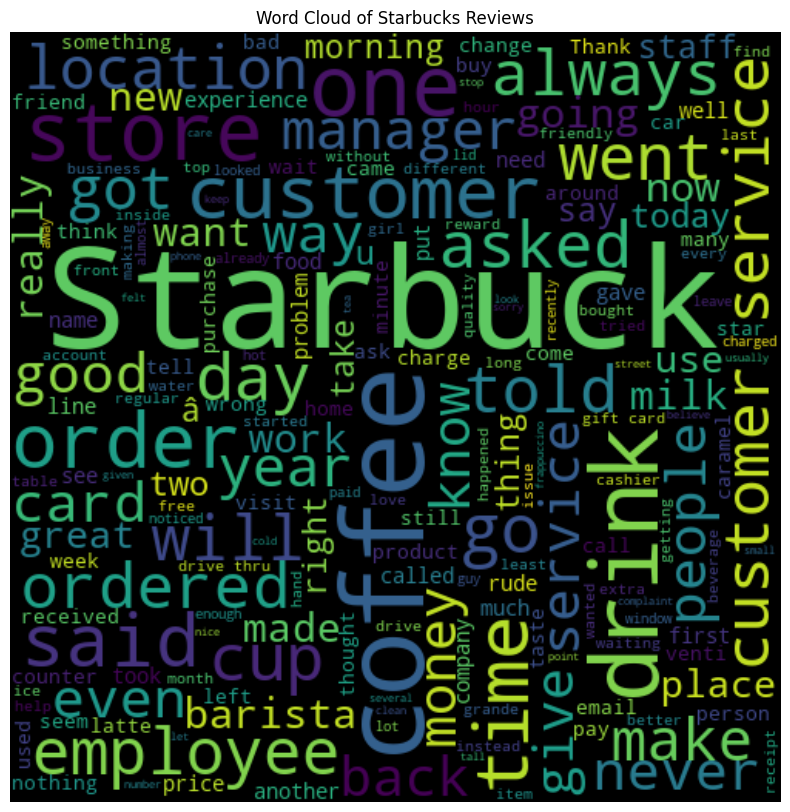

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud of Starbucks Reviews")
plt.show()

# TASK 1 : Term Frequency Matrix**

⭐: **Task 1: (5 min)**
<br> a) Create a term frequency matrix using data in the Reviews Column.

In [23]:
def clean_text(text):
    tokens = word_tokenize(text.lower())
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_tokens = [t for t in word_tokens if t not in stop]
    lemma = WordNetLemmatizer()
    lemmatized_token = [lemma.lemmatize(t) for t in clean_tokens]
    return " ".join(lemmatized_token)

In [24]:
df_review['Cleaned_Review'] = df_review['Review'].apply(clean_text)

C:\Users\Amroy\AppData\Local\Temp\ipykernel_21672\4143843077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Cleaned_Review'] = df_review['Review'].apply(clean_text)


In [25]:
df_review

,Review,Cleaned_Review
0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway alwa...
1,** at the Starbucks by the fire station on 436...,starbucks fire station altamonte spring fl mad...
2,I just wanted to go out of my way to recognize...,wanted go way recognize starbucks employee bil...
3,Me and my friend were at Starbucks and my card...,friend starbucks card work thankful worker pai...
4,Iâm on this kick of drinking 5 cups of warm ...,kick drinking cup warm water work instacart ri...
...,...,...
845,I ordered two venti frappacino's without whipp...,ordered two venti frappacino without whipped c...
846,No Review Text,review text
847,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",demanded tip made wait coffee cold melted yet ...
848,No Review Text,review text


In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv = CountVectorizer(min_df=2,max_df=0.9)

In [84]:
tfm=cv.fit_transform(df_review['Cleaned_Review'])

In [85]:
tf_matrix_df = pd.DataFrame(tfm.toarray(), columns=cv.get_feature_names_out())
tf_matrix_df

,able,absolute,absolutely,ac,accept,acceptable,accepted,accepting,access,accident,...,yes,yesterday,yet,yogurt,york,young,younger,yr,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task 2 : Generate a vocabulary:**
⭐: **Task 2: (5 min)**

In [86]:
# Step 2: Extract the vocabulary
vocabulary = cv.get_feature_names_out()

# Step 3: Display the vocabulary
print(f"Vocabulary Size: {len(vocabulary)}")
print(f"Vocabulary: {vocabulary[:50]}")  

Vocabulary Size: 2416
Vocabulary: ['able' 'absolute' 'absolutely' 'ac' 'accept' 'acceptable' 'accepted'
 'accepting' 'access' 'accident' 'accidentally' 'accommodate' 'according'
 'account' 'acct' 'accused' 'ache' 'achieve' 'acknowledge' 'acknowledged'
 'across' 'act' 'acted' 'acting' 'action' 'activate' 'activity' 'actual'
 'actually' 'ad' 'add' 'added' 'addicted' 'adding' 'addition' 'additional'
 'address' 'addressed' 'adjust' 'adore' 'adult' 'advance' 'advantage'
 'advertised' 'advise' 'advised' 'affected' 'afford' 'afternoon' 'age']


In [87]:
word_frequencies = np.array(tfm.sum(axis=0)).flatten()  # Sum term frequencies for each word

vocab_df = pd.DataFrame({
    'Word': cv.get_feature_names_out(),
    'Frequency': word_frequencies
}).sort_values(by='Frequency', ascending=False)
# Display the top 20 words
print(top_20_words)

           Word  Frequency
4146  starbucks       1051
808      coffee        619
1045   customer        409
1307      drink        376
4437       time        336
4205      store        309
2962        one        294
1823        get        283
3859    service        263
2984      order        248
628        card        230
1843         go        227
2466       like        227
3728       said        217
4940      would        213
4858       went        180
1073        day        169
1030        cup        168
1414   employee        166
320        back        165


# Task 3: Visualize the Frequencies with a word cloud:**
⭐: **Task 3: (5 min)**
Use the vocabulary that you generated and consider appropriate values for min_df and max_df.

In [88]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=500,height=500,background_color="black",stopwords = STOPWORDS)

In [89]:
wc.generate(" ".join(df_review['Cleaned_Review'].astype(str).tolist()))

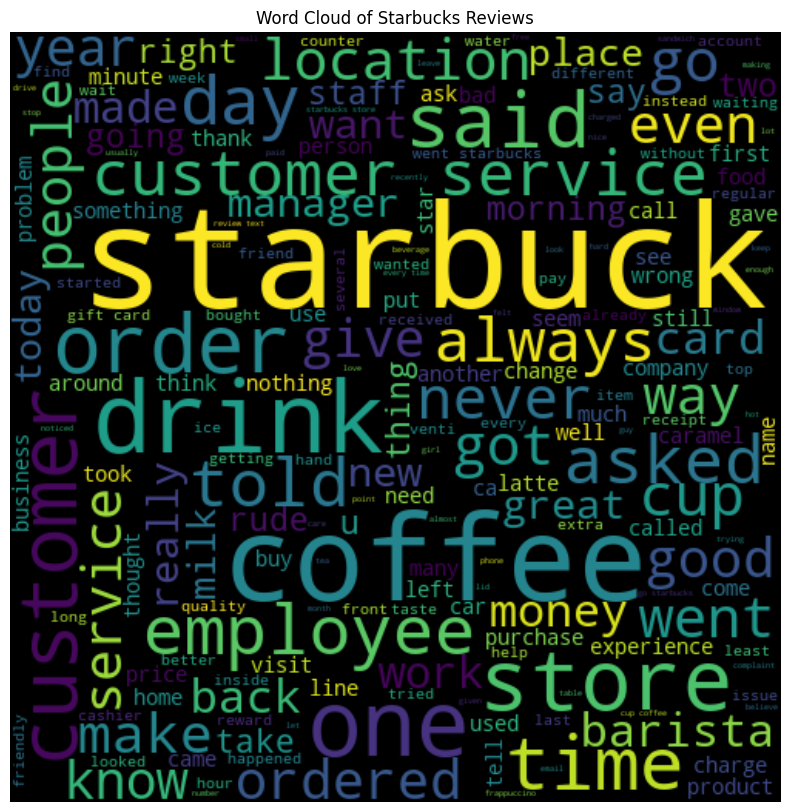

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud of Starbucks Reviews")
plt.show()

# Task 4 : Calculate Probabilities:**
⭐: **Task 4: (5 min)**
Given that you have frequencies of the words, it will be easy to calculate their individual probabilites. But what about conditional probabilities?

Over all reviews, which phrase has the highest probability of occuring?

# Probabilities

In [110]:
import string
from collections import defaultdict
 
# Step 1: Preprocess the text
 
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Split text into words
    words = text.split()
    return words
 
# Apply preprocessing to each review
df['Processed_Review'] = df['Review'].apply(preprocess_text)
 
# Step 2: Calculate conditional probabilities of words following "Starbucks is"
phrase = "starbucks is"
phrase_count = 0
word_following_count = defaultdict(int)
 
# Loop through each review
for review in df['Processed_Review']:
    for i in range(len(review) - 2):
        # Check if the phrase "starbucks is" is found
        if review[i] == "starbucks" and review[i+1] == "is":
            phrase_count += 1
            # The word following "starbucks is"
            following_word = review[i+2]
            word_following_count[following_word] += 1
 
# Step 3: Calculate conditional probabilities
conditional_probabilities = {word: count / phrase_count for word, count in word_following_count.items()}
 
# Step 4: Print results
print(f"Total occurrences of the phrase '{phrase}': {phrase_count}\n")
print("Conditional probabilities of words following 'Starbucks is':\n")
for word, prob in sorted(conditional_probabilities.items(), key=lambda item: item[1], reverse=True):
    print(f"'{word}': {prob:.4f}")


Total occurrences of the phrase 'starbucks is': 41

Conditional probabilities of words following 'Starbucks is':

'not': 0.1220
'a': 0.0976
'located': 0.0976
'so': 0.0732
'making': 0.0488
'the': 0.0488
'right': 0.0488
'ignoring': 0.0244
'having': 0.0244
'doing': 0.0244
'supposed': 0.0244
'taking': 0.0244
'laughing': 0.0244
'thatâs': 0.0244
'one': 0.0244
'expensive': 0.0244
'getting': 0.0244
'currently': 0.0244
'my': 0.0244
'good': 0.0244
'worst': 0.0244
'too': 0.0244
'no': 0.0244
'changing': 0.0244
'always': 0.0244
'24': 0.0244


In [101]:

total_word_count = vocab_df['Frequency'].sum() #claculating the total no.of words i.e. sum of all word frequencies
total_word_count

32327

In [102]:
#claculate probablity of each word
vocab_df['Probability'] = vocab_df['Frequency'] / total_word_count
vocab_df

,Word,Frequency,Probability
2015,starbucks,1051,0.032512
406,coffee,619,0.019148
528,customer,409,0.012652
640,drink,376,0.011631
2160,time,336,0.010394
...,...,...,...
533,damaged,2,0.000062
1838,scan,2,0.000062
1839,scanned,2,0.000062
1840,scar,2,0.000062


In [103]:
print(vocab_df[['Word', 'Frequency', 'Probability']].head(20)) #top 20 words with highest probabilities

           Word  Frequency  Probability
2015  starbucks       1051     0.032512
406      coffee        619     0.019148
528    customer        409     0.012652
640       drink        376     0.011631
2160       time        336     0.010394
2047      store        309     0.009559
1431        one        294     0.009095
894         get        283     0.008754
1883    service        263     0.008136
1442      order        248     0.007672
312        card        230     0.007115
906          go        227     0.007022
1193       like        227     0.007022
1813       said        217     0.006713
2393      would        213     0.006589
2350       went        180     0.005568
541         day        169     0.005228
525         cup        168     0.005197
688    employee        166     0.005135
166        back        165     0.005104
